## Understanding the Data & Preprocessed 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_excel('C:/Data_Fajar/Data_Science_Projects_2/Data_Train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.shape

(10683, 11)

In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.dropna(inplace=True)

#### Data Cleaning for modelling purposes

In [7]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
def change_to_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [9]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_to_datetime(i)

In [11]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [12]:
#seperate day, month, year from date_of_journey so ML model can understand it
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month

#the all data is in year of 2019

In [13]:
train_data.drop('Date_of_Journey', axis= 1, inplace=True)

In [14]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-12-19 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-12-19 05:50:00,2021-12-19 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-12-19 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-12-19 18:05:00,2021-12-19 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-12-19 16:50:00,2021-12-19 21:35:00,4h 45m,1 stop,No info,13302,3,1


## Extract derived features from data

In [15]:
#Process Dep_time and Arrival_time variable

In [16]:
def extract_hour(df, col):
    df[col+'_hour'] = df[col].dt.hour
    
def extract_minute(df, col):
    df[col+'_minute'] = df[col].dt.minute
    
def drop_column(df, col):
    df.drop(col, axis = 1, inplace = True)

In [17]:
extract_hour(train_data, 'Dep_Time')
extract_minute(train_data, 'Dep_Time')
drop_column(train_data, 'Dep_Time')

In [18]:
extract_hour(train_data, 'Arrival_Time')
extract_minute(train_data, 'Arrival_Time')
drop_column(train_data, 'Arrival_Time')

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [20]:
# Process duration variable

In [21]:
duration_list = list(train_data['Duration'])

In [22]:
x='2h 50m'
len(x.split(' '))

2

In [23]:
for i in range(len(duration_list)):
    if len(duration_list[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration_list[i]:
            duration_list[i] = duration_list[i] + ' 0m'
        else:
            duration_list[i] = '0h ' + duration_list[i]

In [24]:
train_data['Duration'] = duration_list

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


## Perform Data Pre-processing 

In [26]:
#Dealing with Duration variable (fetch to different group (hour , minute))

In [27]:
'7h 25m'.split(' ')[0][0:-1]

'7'

In [28]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

In [29]:
train_data['Duration_hours'] = train_data['Duration'].apply(hour)
train_data['Duration_minutes'] = train_data['Duration'].apply(minute)

In [30]:
drop_column(train_data, 'Duration')

In [31]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_minutes       object
dtype: object

In [32]:
#convert data types Duration_minutes & hours 
train_data['Duration_hours'] = train_data['Duration_hours'].astype(int)
train_data['Duration_minutes'] = train_data['Duration_minutes'].astype(int)

### Seperate Numerical and Categorical Data

In [33]:
cat_col = [col for col in train_data.columns if train_data[col].dtype == 'O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [34]:
cont_col = [col for col in train_data.columns if train_data[col].dtype != 'O']
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_minutes']

## Handling Categorical data & feature encoding

In [35]:
categorical = train_data[cat_col]

In [36]:
categorical.head()
# 1. Dealing with Airline variable

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [37]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

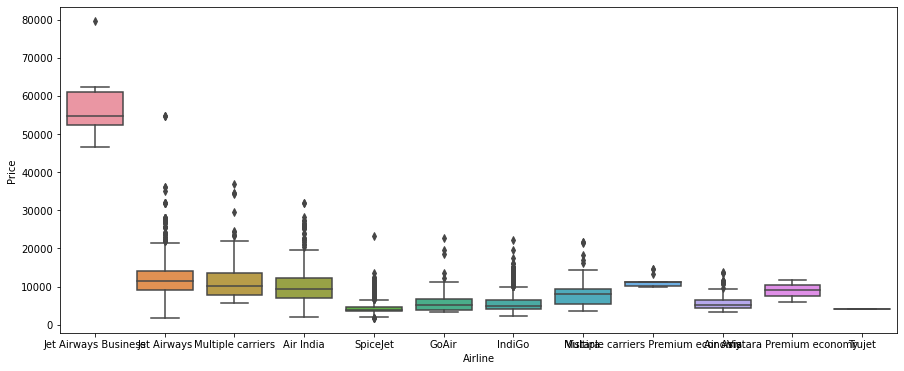

In [38]:
# find the relationship between Airline and Prices 
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Airline', y='Price', data=train_data.sort_values('Price', ascending = False))


#Jet Airways has highest price compare to others airline

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

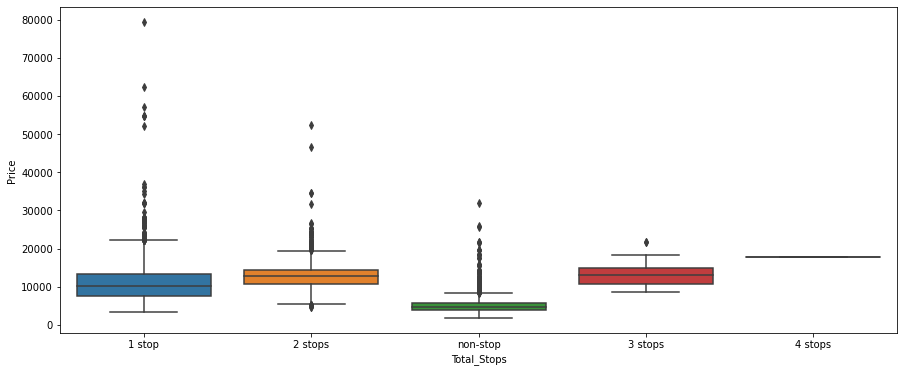

In [39]:
# find the relationship between Total_Stops and Prices 
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Total_Stops', y='Price', data=train_data.sort_values('Price', ascending = False))

#flight has 1 stop have higher fluctuations and fare compare others

In [40]:
# convert Airline variable to integer format
airline = pd.get_dummies(categorical['Airline'], drop_first=True)

In [41]:
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [42]:
# convert Source variable to integer format
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

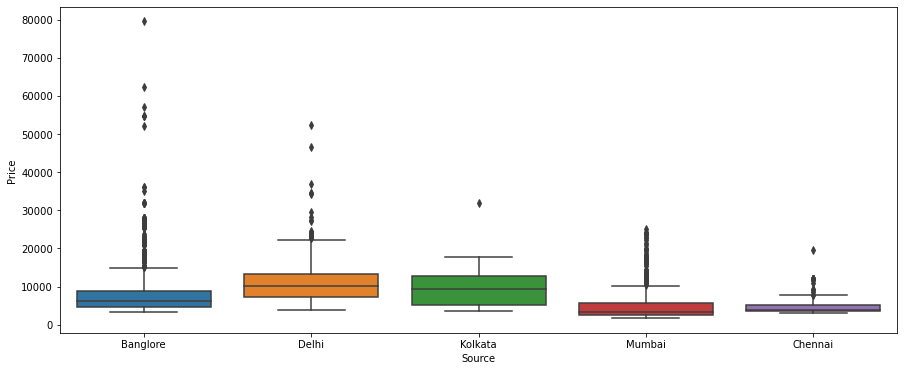

In [43]:
# find the relationship between Source and Prices 
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Source', y='Price', data=train_data.sort_values('Price', ascending = False))

#Bangalore have higher fluctuations and fare compare others

In [44]:
# convert Source variable to integer format
source = pd.get_dummies(categorical['Source'], drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


<AxesSubplot:xlabel='Destination', ylabel='Price'>

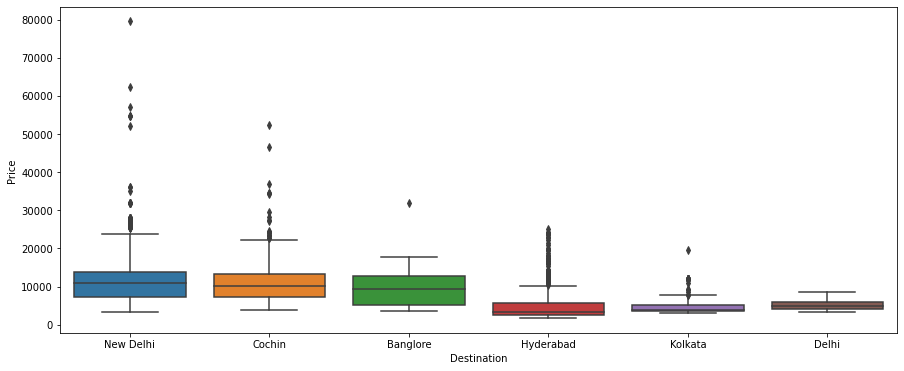

In [45]:
# find the relationship between Destination and Prices 
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Destination', y='Price', data=train_data.sort_values('Price', ascending = False))

# New Delhi have higher fluctuations and fare compare others

In [46]:
# convert Destination variable to integer format
destination = pd.get_dummies(categorical['Destination'], drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


## Perform label encoding 

In [47]:
categorical.head()
# dealing with Route variable

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [48]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [49]:
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

In [50]:
drop_column(categorical, 'Route')

In [51]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [52]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [53]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [54]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None', inplace = True)

In [55]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [56]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i, len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
encoder = LabelEncoder()

In [59]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [60]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i] = encoder.fit_transform(categorical[i])

In [61]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [62]:
#Dealing with Total_Stops variable and drop Additional_Info
drop_column(categorical, 'Additional_Info')

In [63]:
categorical['Total_Stops'].unique()
# convert non stop = 0, 1 stop = 1

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [64]:
dict = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}

In [65]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

In [66]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [67]:
# concatenate from previous df you been manipulate
data_train = pd.concat([categorical, airline, source, destination, train_data[cont_col]], axis = 1)

In [68]:
drop_column(data_train, 'Airline')
drop_column(data_train, 'Source')
drop_column(data_train, 'Destination')

In [69]:
pd.set_option('display.max_columns', 35)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


## Handling Outliers in Data

### 1. Oulier detection & outlier imputation if available in data

In [70]:
def plot(df, col):
    fig, (ax1, ax2) = plt.subplots(2,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)

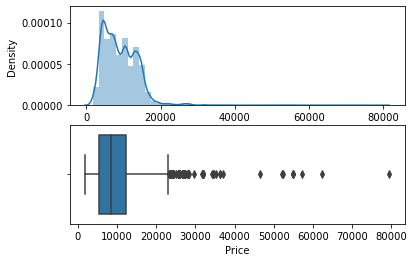

In [71]:
plot(data_train, 'Price')
# after talking to the expert we decide outliers lies greater than 40.000
# and replace it with median

In [72]:
data_train['Price'] = np.where(data_train['Price'] >= 40000, data_train['Price'].median(), data_train['Price'])

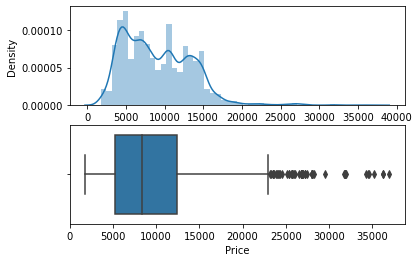

In [73]:
plot(data_train, 'Price')

### 2. Seperate Y (Price) and X (others) variable

In [74]:
X = data_train.drop('Price', axis = 1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [75]:
y = data_train['Price']

## Select best feature using selection technique

In [76]:
# feature selection is about best X variabel 
# which most contribute and has good relationship with Y variable

In [77]:
from sklearn.feature_selection import mutual_info_classif

In [78]:
mutual_info_classif(X, y)

array([2.15426914e+00, 2.06254951e+00, 2.84833536e+00, 2.31607607e+00,
       1.51551199e+00, 7.89980515e-01, 7.40443780e-01, 1.05652578e-01,
       6.55044130e-01, 9.28923496e-01, 5.83077447e-04, 5.72505108e-01,
       0.00000000e+00, 3.37456094e-01, 0.00000000e+00, 2.10966880e-01,
       0.00000000e+00, 1.81863781e-01, 1.55780651e+00, 8.80497018e-01,
       2.83816910e-01, 1.55753013e+00, 4.11768472e-01, 2.95621256e-01,
       1.80797196e-01, 3.81689174e-01, 1.08779486e+00, 8.69571888e-01,
       1.42268951e+00, 1.20935310e+00, 1.81199664e+00, 1.51804172e+00,
       1.80401272e+00, 1.07875951e+00])

In [79]:
imp = pd.DataFrame(mutual_info_classif(X, y), index = X.columns)
imp.head()

,0
Total_Stops,2.162313
Route_1,2.075711
Route_2,2.802113
Route_3,2.313663
Route_4,1.478171


In [80]:
imp.columns = ['importance']
imp.sort_values(by= 'importance', ascending=False)

,importance
Route_2,2.802113
Route_3,2.313663
Total_Stops,2.162313
Route_1,2.075711
Arrival_Time_hour,1.825947
Duration_hours,1.764416
Cochin,1.557836
Arrival_Time_minute,1.547843
Delhi,1.516628
Route_4,1.478171


## Applying Random Forest on Data & Automate Predictions

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
from sklearn import metrics
import pickle

In [84]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training score : {}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print('Prediction are :\n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('R2 score : {}'.format(r2_score))
    
    print('MAE : ', metrics.mean_absolute_error(y_test, y_prediction))
    print('MSE :', metrics.mean_squared_error(y_test, y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))
    
    sns.distplot(y_test - y_prediction)
    
    #if dump == 1:
        #file = open('C:/Data_Fajar/Data_Science_Projects_2/model.pkl','wb')
        #pickle.dump(model, file)
        
    #if we get normal distribution means model is performing good
    

In [85]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9547436479755858
Prediction are :
 [6809.43702381 9823.79       3821.78990476 ... 9482.42       7629.37
 7801.87      ]


R2 score : 0.7959121372941741
MAE :  1208.4766290821174
MSE : 4103922.0683832434
RMSE :  2025.8139273840634


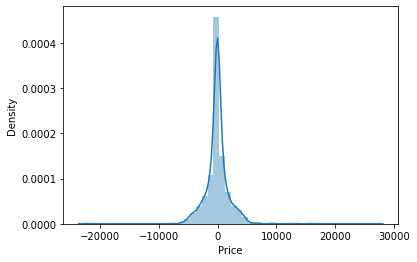

In [86]:
predict(RandomForestRegressor())

## Playing with multiple ML algorithm

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
#from sklearn import svm
#from xgboost import XGBRegressor
from sklearn.linear_model import ARDRegression, GammaRegressor, RANSACRegressor
from sklearn.linear_model import HuberRegressor, PassiveAggressiveRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
#from sklearn.ensemble import HistGradientBoostingRegressor, StackingRegressor

Training score : 0.6233156455444422
Prediction are :
 [ 6920.3840249  10315.71129744  4387.58041809 ... 11636.35290786
 10111.00773587 10814.08257268]


R2 score : 0.5865802135863425
MAE :  2006.9363527375783
MSE : 8313294.884247241
RMSE :  2883.278495783444


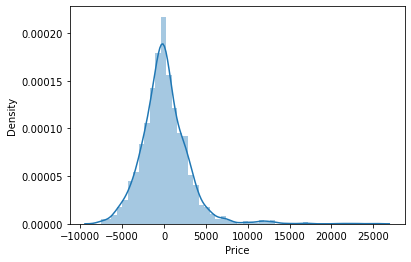

In [88]:
predict(LinearRegression())

Training score : 0.787598555411154
Prediction are :
 [ 6851.6 11383.2  4856.2 ...  9726.6  7963.   7298.8]


R2 score : 0.628070069626896
MAE :  1778.5732335049133
MSE : 7478991.787721105
RMSE :  2734.774540564744


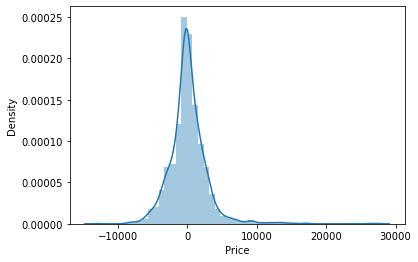

In [89]:
predict(KNeighborsRegressor()) # When your dataset is huge never go with KNN

Training score : 0.9671271680868373
Prediction are :
 [ 6686.5 11228.   3885.  ...  9443.   7670.   7563. ]


R2 score : 0.7144675100274605
MAE :  1342.5198330993605
MSE : 5741659.848375059
RMSE :  2396.1760887662363


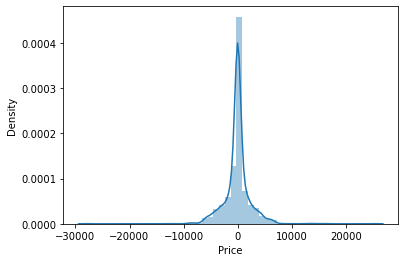

In [90]:
predict(DecisionTreeRegressor())

Training score : 0.46775892334698654
Prediction are :
 [ 4544. 12488.  3911. ...  9443.  7005.  7878.]


R2 score : 0.6198318960449807
MAE :  1596.839026672906
MSE : 7644649.960224614
RMSE :  2764.8960125517583


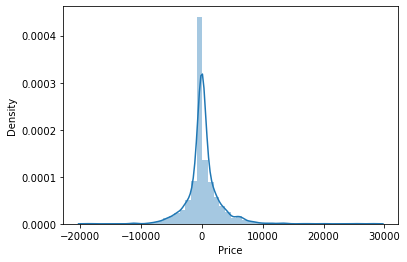

In [91]:
predict(GaussianNB())

Training score : 0.5429166974695969
Prediction are :
 [ 6199.74242409 12170.2945266   4713.14019992 ... 11576.77359341
 10255.06426962 10649.38550559]


R2 score : 0.4980008462291923
MAE :  2203.8910918133806
MSE : 10094502.329319172
RMSE :  3177.1846545832323


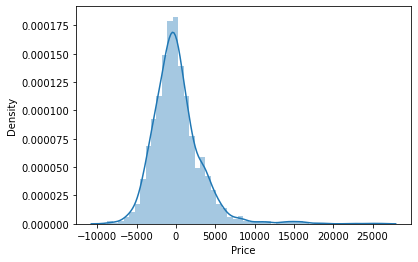

In [92]:
predict(MLPRegressor())

Training score : 0.638855733640189
Prediction are :
 [ 5348.02734958 10602.47231986  5131.20896861 ... 10942.24454393
 10501.31034483 13525.33238636]


R2 score : 0.5898539727483239
MAE :  2207.778640689365
MSE : 8247464.156768886
RMSE :  2871.839855696847


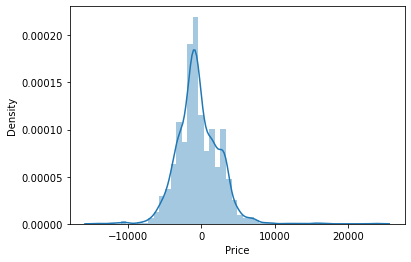

In [93]:
predict(AdaBoostRegressor())

## How to cross validate the model 

### 1. Hypertune the model to get more accuracy 

In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [95]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=6)]
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=4)]

In [96]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features':['auto','sqrt'],
    'max_depth': max_depth,
    'min_samples_split': [5, 10, 15, 100]
}

In [97]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [98]:
reg_rf = RandomForestRegressor()

In [99]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3, verbose=2, n_jobs=-1)

In [100]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [101]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 30}

In [102]:
prediction = rf_random.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

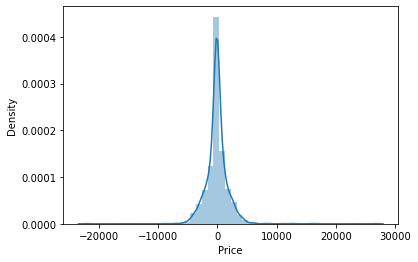

In [103]:
sns.distplot(y_test - prediction)

In [104]:
metrics.r2_score(y_test, prediction)
#there is increase in accuracy when we do hypertune from 0.79 to 0.81

0.8167368461263672